#### Sea Level Predictor

### Assignment

You will anaylize a dataset of the global average sea level change since 1880. You will use the data to predict the sea level change through year 2050.

Use the data to complete the following tasks:
* Use Pandas to import the data from `epa-sea-level.csv`.
* Use matplotlib to create a scatter plot using the "Year" column as the x-axis and the "CSIRO Adjusted Sea Level" column as the y-axix.
* Use the `linregress` function from `scipy.stats` to get the slope and y-intercept of the line of best fit. Plot the line of best fit over the top of the scatter plot. Make the line go through the year 2050 to predict the sea level rise in 2050.
* Plot a new line of best fit just using the data from year 2000 through the most recent year in the dataset. Make the line also go through the year 2050 to predict the sea level rise in 2050 if the rate of rise continues as it has since the year 2000.
* The x label should be "Year", the y label should be "Sea Level (inches)", and the title should be "Rise in Sea Level".

Unit tests are written for you under `test_module.py`.

### Development

For development, you can use `main.py` to test your functions. Click the "run" button and `main.py` will run.

### Testing 

We imported the tests from `test_module.py` to `main.py` for your convenience. The tests will run automatically whenever you hit the "run" button.

### Submitting

Copy your project's URL and submit it to freeCodeCamp.

### Data Source
Global Average Absolute Sea Level Change, 1880-2014 from the US Environmental Protection Agency using data from CSIRO, 2015; NOAA, 2015.
https://datahub.io/core/sea-level-rise


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import linregress
%matplotlib inline

In [2]:
df=pd.read_csv("C:/Users/Frances-Anthony/Documents/Udacity/Freecodecamp/epa-sea-level.csv")
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      134 non-null    int64  
 1   CSIRO Adjusted Sea Level  134 non-null    float64
 2   Lower Error Bound         134 non-null    float64
 3   Upper Error Bound         134 non-null    float64
 4   NOAA Adjusted Sea Level   21 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 5.4 KB


In [4]:
df.shape

(134, 5)

In [5]:
df.columns = df.columns.str.replace(' ','_').str.lower()
df.columns

Index(['year', 'csiro_adjusted_sea_level', 'lower_error_bound',
       'upper_error_bound', 'noaa_adjusted_sea_level'],
      dtype='object')

#### Question 1
- Use matplotlib to create a scatter plot using the "Year" column as the x-axis and the "CSIRO Adjusted Sea Level" column as the y-axix.

In [6]:
df.head()

,year,csiro_adjusted_sea_level,lower_error_bound,upper_error_bound,noaa_adjusted_sea_level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


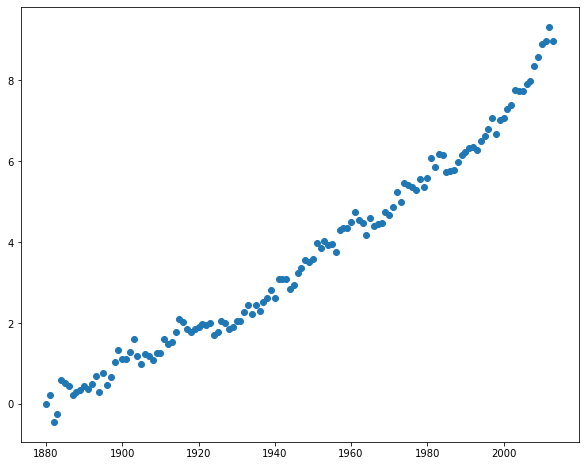

In [7]:
plt.figure(figsize=(10,8))
plt.scatter(x='year', y='csiro_adjusted_sea_level', data=df)
plt.show()

#### Question 2
 - Use the linregress function from `scipy.stats` to get the slope and y-intercept of the line of best fit. Plot the line of best fit over the top of the scatter plot. Make the line go through the year 2050 to predict the sea level rise in 2050.

In [53]:
#df.tail(5)

In [54]:
#view the unique years in the data
#df.year.unique()

In [55]:
# calc line of best fit
#line = linregress(df['year'], df['csiro_adjusted_sea_level'])
#line

In [64]:
#np.arange( x.min(),2050,1)

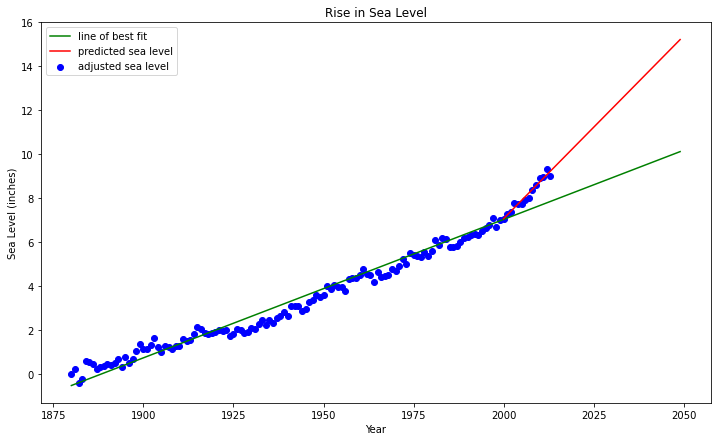

In [65]:
# Create plot with original data
plt.figure(figsize=(12,7))
plt.scatter(color = 'blue', x='year', y='csiro_adjusted_sea_level', data=df, label = 'adjusted sea level')

# line of best fit for original data
line_of_fit = linregress(df['year'], df['csiro_adjusted_sea_level'])
# extend year to 2050
x = np.arange(df['year'].min(),2050,1) 
y = x * line_of_fit.slope + line_of_fit.intercept
plt.plot(x,y, label = 'line of best fit', color='green');

# Create second line of best fit for year predicted rise in sea level up to year 2050
year_2000_up = df[df['year'] >= 2000]
line_of_fit = linregress(year_2000_up['year'], year_2000_up['csiro_adjusted_sea_level'])
x = np.arange(2000,2050,1)
y = x * line_of_fit.slope + line_of_fit.intercept
plt.plot(x,y, label= 'predicted sea level', color='red')

plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')
plt.title('Rise in Sea Level')
plt.legend(fontsize='medium')

 # Save plot
plt.savefig('sea_level_plot.png')

plt.show()